# Visualizing KNN (2-D)

- Created by: Si_ja
- https://github.com/Si-ja
- Date: 2019-05-01

## The outline:

1. [Introduction](#introduction)
2. [Importing packages](#importing-packages)
3. [Step-by-step explanation of the overal procedure](#step-by-step)
    - [Building a KNN model](#subbuilding-a-knn-model)
    - [Visualizing a KNN model](#subknn-viz)
    - [Saving the model and the plot](#subsaving-models)
4. [Putting everything together in a convenient reusable code](#all-in-one)
5. [References](#references)

## 1. Introduction <a name="introduction"></a>

This is a small educational file dedicated to providing data on how you can visualize the work of a KNN Machine Learning algorithm. 

__The core idea for creating of this file__: I have seen online quite a lot of examples how to visualize work of a KNN algorithm, however, most of them never had a proper explanation what is being done with the code or what happens with the data. Rather everything felt was oriented towards achieving the result and following more of an apporach of: *just copy the code, it will work*. This file does not bring anything particularly new to the table, but hopefully can be used as an educational material helping people understand what they are doing and yield most benefit to beginers who are just learning and getting into Machine Learning and working with python. However, it is expected that the users have some basic knowledge of the language already and the theory behind Machine Learning, Data Mining (particularly KNNs).

Naturally, the visualization of a KNN algorithm can be most optimally done only with a $2$ dimensional plane and that is what this file will be focused on.

This method can be used to experiment straight away - out of the box. It does not need any preparation besides installation of few needed packages. Otherwise - no external files are needed to work with it. If you wish to apply the method to your own data - oof...that's up to you to transform your data in a needed way. Although, instructions how such preparation can be done are addressed in this educational material.

## 2. Importing packages <a name="importing-packages"></a>

For working on this project we will require several packages to import. Simple vanila approach will not do. Do take note which packages are required and which are optional:

### Required packages:
- sklearn
- matplotlib
- numpy

### Optional packages:
- joblib

Explanation which packages is used for what will come with thier importing and even more clear one with their usage.

In [1]:
from sklearn.neighbors import KNeighborsClassifier    
#Classifier that will allow for building of a KNN model

from sklearn.model_selection import train_test_split  
#Will allow to conveniently split our data 

from sklearn import datasets                          
#Will provide us with data to work with

import matplotlib.pyplot as plt                       
#Will allow us to create a plot and vizualize KNN in action

from matplotlib.colors import ListedColormap          
#Will provide a possibility to generate a colormap 

import numpy as np                                    
#Will allow to manipulate data easier



#OPTIONAL:
from joblib import dump, load                         
#Will allow to save and/or load the created KNN model

## 3. Step-by-step explanation of the overal procedure <a name="step-by-step"></a>

Onwards - we prepare the data, build a model, visualize its work and save it.

### 3.1 Building a KNN model <a name="subbuilding-a-knn-model"></a>

This point will address the preparation of data and building of the model to work with.

First of all - load the data with which you desire to work with. It can be your data, or as in our example, we will use the iris dataset that we can utilize after performing the following action earlier **from sklearn import datasets**.

In [2]:
iris = datasets.load_iris() 
#Load the data

In [3]:
iris.data 
#Our data is located in iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names 
#meaning of each column is located in the iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target 
#The target values are located in iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names 
#The names of targets/classes represented by 0,1,2 are located in iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Example: if we wish to know something about a particular record (let's say record 42) knowing above commands we can execute the following code:

In [7]:
print("Overal data of the instance #42:\t", iris.data[42])
print("Column names:\t\t\t\t", iris.feature_names)
print("Type of the flower under instance #42:\t", iris.target_names[iris.target[42]])

Overal data of the instance #42:	 [4.4 3.2 1.3 0.2]
Column names:				 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of the flower under instance #42:	 setosa


The above code tels us:
1. We have selected the 42nd instance from iris.data (or 43rd to be specific, seeing as arrays start from 0, so it's a bit of a lie, but for this demonstration instance: just go with it).

2. For the feature names we see that the first value of the 42nd instance is the speal length, second - sepal width, third - petal length, fourth - petal widht.

3. Lastly - from iris.target_names we select the name of the flower. iris.target[42] function establishes whether the flower is coded with a 0, 1 or a 2. afterward, that values is put into the mask for selecting the target name. Meaning iris.target[42] -> 0 and then iris.target_names[0] -> setosa. 

Putting all together: a flower with a sepal length of 4.4cm, sepal width of 3.2cm, petal length of 1.3cm and a petal width of 0.2cm during the observations was classified as a setosa.

This explanation is dedicated for the sake of us understanding what the data is that we deal with, so it is not kept as a mystery.

As we have seen, we have $4$ dimensions to work with: 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']
 
 We however, can work in our case only with 2. Therefore, for the next step we want to reduce our data and save it into new variables.

In [8]:
X = iris.data[:, :2] 
#Selecting all rows, but only 0th and 1st columns to work with. Everything saved into a variable X.


y = iris.target      
#Target values do not need any transformation, therefore everything is just saved into a y varaible.

To understand what kind of data we ended up with, we can call our variables:

In [9]:
X 
#the dataset got reduced to only having to variables

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [10]:
y 
#no changes took place for the target values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We want our data to be shuffled and seperated into training and test sets. Training will be usde to create our KNN model. Testing set will be dedicated to evaluating the accuracy of a KNN model on an unseen data. We can do it very conveniently with the following method. It utilized the earlier called function **from sklearn.model_selection import train_test_split**.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)

#Before calling the function, you need to indicate 4 variables into which data will be split. 
#Conventional methods call to the approach of calling given variables as:
#X_train, X_test, y_train, y_test
#The data is re-distributed from X and y variables

#Test_seize value indicates how much of our data will be in the test set and in the training set.
#For this example we will have a test size of 25% of our data and in the training 75%

#Random state can be any number, it's just a seed value used for replication purposes
#And particularly it shuffles the data and is responsible for deciding which instances will end up in the training set
#And which in the training set

Let us see what we ended up with:

In [12]:
X_train

array([[5.2, 4.1],
       [6.2, 2.2],
       [7.3, 2.9],
       [6.4, 3.2],
       [6. , 3.4],
       [5.2, 2.7],
       [5.4, 3.7],
       [5.3, 3.7],
       [5. , 3.5],
       [4.4, 2.9],
       [5.8, 2.7],
       [5.2, 3.4],
       [4.6, 3.4],
       [6.5, 3.2],
       [5.7, 2.9],
       [6.6, 3. ],
       [6. , 2.9],
       [4.7, 3.2],
       [4.9, 3.6],
       [6.7, 3.1],
       [6.3, 2.7],
       [6.1, 2.8],
       [6.2, 2.8],
       [5.7, 4.4],
       [6.3, 2.5],
       [6.4, 2.9],
       [5.1, 3.8],
       [6.8, 2.8],
       [5.1, 3.5],
       [4.3, 3. ],
       [5.9, 3. ],
       [6.4, 2.8],
       [5.6, 2.8],
       [5.5, 2.4],
       [6.9, 3.1],
       [6.3, 3.4],
       [6.5, 3. ],
       [5.7, 3.8],
       [6.6, 2.9],
       [6.7, 3.3],
       [4.8, 3. ],
       [5. , 3.6],
       [6. , 3. ],
       [5. , 3. ],
       [6.1, 3. ],
       [6.4, 3.1],
       [5.1, 3.7],
       [5.7, 3. ],
       [5. , 3.5],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.4, 3. ],
       [6.5,

In [13]:
X_test

array([[5.6, 3. ],
       [5.8, 2.8],
       [5. , 2.3],
       [5.8, 2.7],
       [4.6, 3.1],
       [5.5, 2.5],
       [5.7, 2.8],
       [6.5, 3. ],
       [6.3, 2.3],
       [5.5, 2.6],
       [6.7, 3.1],
       [4.5, 2.3],
       [4.8, 3.1],
       [5.4, 3.4],
       [7.2, 3.6],
       [5.8, 2.7],
       [4.6, 3.6],
       [7.2, 3.2],
       [6.9, 3.1],
       [6.4, 2.7],
       [6.3, 3.3],
       [5. , 3.4],
       [7.7, 2.6],
       [5. , 3.3],
       [6.2, 2.9],
       [5.9, 3. ],
       [5. , 3.2],
       [5.5, 2.3],
       [6.3, 3.3],
       [7.7, 3. ],
       [5.1, 3.5],
       [4.9, 3. ],
       [5.7, 2.8],
       [6.2, 3.4],
       [5.1, 2.5],
       [7. , 3.2],
       [6.1, 2.6],
       [7.6, 3. ]])

In [14]:
y_train

array([0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 2])

In [15]:
y_test

array([1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2])

As we see - our data was split and shuffled. Now we can build our model. This is possible as earlier we have executed the **from sklearn.neighbors import KNeighborsClassifier** command.

In [16]:
#We can experiment with how many neighbour values we will be using to make predictions.
#For that - let us put all the values we want to experiment with into a list.
#You can call the variable anything.
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]

In [17]:
#Let us initialize the testing of our model and write a small code for showing us which variable chosen for neighbours
#Does the best on the training set:

#For extra flair we will also make the system decide for us which is the best amount of neigbours to use.
#It might seem easy to chose in this case, but in the real world with many tests: not as much
results = {} #initalize the creation of an empty dictionary

print("[ ] Initializing the training...")
print()
for n_value in n_neighbors: 
    #go through the values in the list created above
    #initialize the creation of our model
    #more parameters can be specified in the (), but for now we will stick only to the amount of neighbors we are influincing
    #it to use. Other values will be set to default ones
    neigh = KNeighborsClassifier(n_neighbors = n_value)
    
    #Train our model with the training data
    neigh.fit(X_train, y_train)
    
    #calculate how well the model did
    final_score = np.round(100*neigh.score(X_test, y_test),2) 
    
    #Evaluate how well our model was trained in respect to accuracy and note with how many neighbours it was done.
    print("The accuray of the model is of {}% when using {} neigbors".format(final_score,
                                                                             n_value))
    
    #update our dictionary
    results[n_value] = final_score 
    
    
print()
print("[X] The training has been completed...")
print()
#Look which value of accuracy is the largest in the dictionary
maximum_val = max(results, key=results.get) 
print("!!!Best to chose using of {} neighbours. On test results it showed the highest accuracy of {}%!!!".format(maximum_val,
                                                                                                          results[maximum_val]))

#After finding the optimal number of neighbors to use, the model must be learned with proper parameters
#This requires re-making of the said model
print()
print("[ ] Initializng the training of the correct model...")
#in this instance our model that is stored in the neigh variable is updated with the required pre-sets
neigh = KNeighborsClassifier(n_neighbors = maximum_val)
#now the model is re-trained with optimal data
neigh.fit(X_train, y_train)
print("[X] Model optimized...")

[ ] Initializing the training...

The accuray of the model is of 71.05% when using 1 neigbors
The accuray of the model is of 78.95% when using 3 neigbors
The accuray of the model is of 76.32% when using 5 neigbors
The accuray of the model is of 78.95% when using 7 neigbors
The accuray of the model is of 78.95% when using 9 neigbors
The accuray of the model is of 81.58% when using 11 neigbors
The accuray of the model is of 78.95% when using 13 neigbors
The accuray of the model is of 78.95% when using 15 neigbors

[X] The training has been completed...

!!!Best to chose using of 11 neighbours. On test results it showed the highest accuracy of 81.58%!!!

[ ] Initializng the training of the correct model...
[X] Model optimized...


By this point - the model has been fully prepared. We are only left to vizualize the results from it.

### 3.2 Visualizing a KNN model <a name="subknn-viz"></a>

As we have our model - we can proceed with making a plot with it.
For that beforehand - we need to do few preparations.

The idea that goes into the creation of a plot - 2 things will be assigned colors. The background and the actual datapoint. The onest that will hold same (similar) colors, means they are predicted correctly, ones that hold different ones - are incorrectly predicted.

What is needed for this is preparation of colors that will be assigned and preparation of the plot. Let's go into this one step at a time.

First we are preparing the colors. This is possible as earlier we have performed the execution of 2 functions: **import matplotlib.pyplot as plt** that can create plots for us and **from matplotlib.colors import ListedColormap** that will work with additional parameters for colors.

In [18]:
#This will tell the future plot to use particular colors for coloring of our points or background.
#The meaning of what is in the list can be ambigious. But it is just a way to note some colorspaces, for a reference,
#if you will need to make your own colors you can use google: 

#Go to google and enter something like #FFF000, you will get what I am refering to

#these are colors redish, grenish, bluish
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) 

#these are colors red, green, blue
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  

#They are a little bit different so on the plot they could be disringuished - where is the background and where are points
#of data. 

#As an example you can see that they hold information not that we can properly work with by just calling it. It will
#come inhandy later.
cmap_light

Now we need to prepare our plot. Our goal will be to create our plot a bit bigger than original ranges our data fits in. This will be done to have a more proper visualization of what we are doing and how our regions are distributed. For that we need to define our regions first.

In [19]:
#Here we are defiing the minimum ad maximum values in our first explanatory variable (column 1) and extending them to both
#sides by 1, by either adding 1 or substracting.
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1

#This is done on the x plane, not specifically for the variable X on its own

print("x plane minimum:\t", x_min)
print("x plane maxmimum:\t", x_max)

x plane minimum:	 3.3
x plane maxmimum:	 8.9


We perform the same operation for the y plane as well. The title y_min and y_max are a bit misleading, as we do not do anything with y variable, but rather we work with the y plane. This needs to be kept in mind.

In [20]:
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print("y plane minimum:\t", y_min)
print("y plane maxmimum:\t", y_max)

y plane minimum:	 1.0
y plane maxmimum:	 5.4


If we would draw our plane that we will use now, it would look the following way:

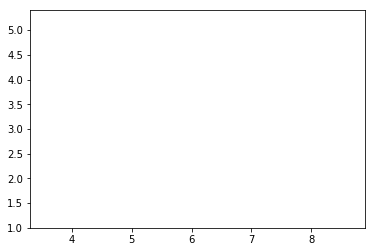

In [21]:
#xlim indicates limits which we would be working with for the x plane
plt.xlim(x_min, x_max) 

#ylim indicates limits which we would be working with for the y plane
plt.ylim(y_min, y_max) 

plt.show()

But it's empty. YES!
But we are getting somewhere. We need to prepare few more things before we finish with it.

Couple of more things include: creating of a step size in a mesh. In very simple terms - that means just the values that by which the plot would be increasing. Say the mesh size is 0.1 and the plot needs to go on x plane from 1 to 2. Then the values would be noted in a list as [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2.0]. This is not so much important for the visual part as for the technical. This is one of the moments I would advise to take as "just accept it". It's much easier than to really getting into, but it is important for creation of a proper vizualization of the whole plot.

In [22]:
#Let's make the step size in the mesh equal something simple:
h = 0.02
#Because this is literally everything that needs to be done for now, I did recomend to not get too in details for it.

Now we need to prepare couple of final things. We need to create something of a rectangular grid. Better explanation can be found here: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [23]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [24]:
#Take a quick note what these functions do with and without the usage of earlier indicated step size in mesh:
print("Mesh size info. is not utilized from before:\n", np.arange(x_min, x_max))
print()
print("Mesh size info. is utilized from before:\n", np.arange(x_min, x_max, h))
#You can notice that the lists act a bit differently now

Mesh size info. is not utilized from before:
 [3.3 4.3 5.3 6.3 7.3 8.3]

Mesh size info. is utilized from before:
 [3.3  3.32 3.34 3.36 3.38 3.4  3.42 3.44 3.46 3.48 3.5  3.52 3.54 3.56
 3.58 3.6  3.62 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78 3.8  3.82 3.84
 3.86 3.88 3.9  3.92 3.94 3.96 3.98 4.   4.02 4.04 4.06 4.08 4.1  4.12
 4.14 4.16 4.18 4.2  4.22 4.24 4.26 4.28 4.3  4.32 4.34 4.36 4.38 4.4
 4.42 4.44 4.46 4.48 4.5  4.52 4.54 4.56 4.58 4.6  4.62 4.64 4.66 4.68
 4.7  4.72 4.74 4.76 4.78 4.8  4.82 4.84 4.86 4.88 4.9  4.92 4.94 4.96
 4.98 5.   5.02 5.04 5.06 5.08 5.1  5.12 5.14 5.16 5.18 5.2  5.22 5.24
 5.26 5.28 5.3  5.32 5.34 5.36 5.38 5.4  5.42 5.44 5.46 5.48 5.5  5.52
 5.54 5.56 5.58 5.6  5.62 5.64 5.66 5.68 5.7  5.72 5.74 5.76 5.78 5.8
 5.82 5.84 5.86 5.88 5.9  5.92 5.94 5.96 5.98 6.   6.02 6.04 6.06 6.08
 6.1  6.12 6.14 6.16 6.18 6.2  6.22 6.24 6.26 6.28 6.3  6.32 6.34 6.36
 6.38 6.4  6.42 6.44 6.46 6.48 6.5  6.52 6.54 6.56 6.58 6.6  6.62 6.64
 6.66 6.68 6.7  6.72 6.74 6.76 6.78

In [25]:
#what are the value xx and yy we actually produced:
print(xx.shape)
print(yy.shape)
#they both have a form of 220x280. Makes sense, as esentially we created a somewhat of a box,
#in which our information is held for the distances we are working with. They will be colorized further.

(220, 280)
(220, 280)


In [26]:
#A bit more of a context what is going on these variables under the hood.
print(xx)
print()
print(yy)

[[3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 ...
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]]

[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.34 5.34 5.34 ... 5.34 5.34 5.34]
 [5.36 5.36 5.36 ... 5.36 5.36 5.36]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]]


In [27]:
#Now we are left to predict the data
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

In [28]:
#What is Z?
print(Z) 
#seems too large to fit in all of our data.

print(Z.shape) 
#it has an unusual shape


#Wait a minute
print(xx.shape[0] * xx.shape[1])
#it's the same shape from what xx and yy uses.

#In short - every single field was predicted what it represents in our grid. That is where the background color comes from.

[0 0 0 ... 2 2 2]
(61600,)
61600


Now we are ready to build our full plot.

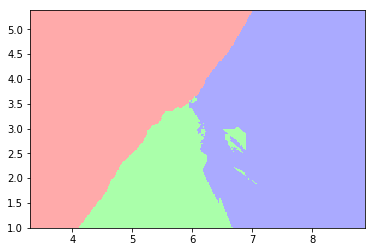

In [29]:
#This is how our background will look like:
#Adjust the Z variable to the plots dimensions
Z = Z.reshape(xx.shape)

#Assign the colors
plt.pcolormesh(xx, yy, Z, cmap=cmap_light) 

#Call to showing of the plot
plt.show()                                 

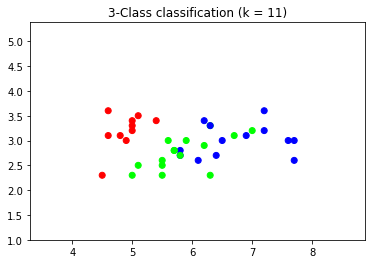

In [30]:
#We can also plot the test points we have
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#give a title and extra info
plt.title("3-Class classification (k = {})".format(maximum_val)) 
plt.show()

Now put everything together:

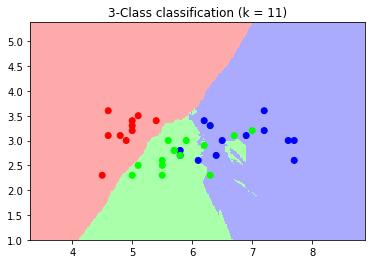

In [31]:
#Put it all together
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {})".format(maximum_val))
plt.show()

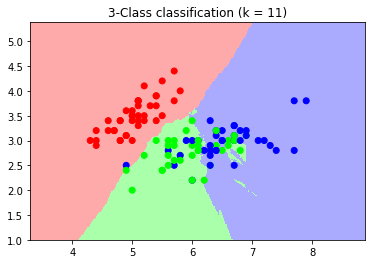

In [32]:
#We can also show how well our training data got fit in
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {})".format(maximum_val))
plt.show()

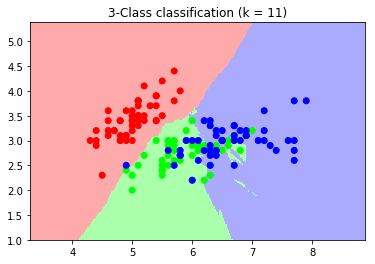

In [33]:
#And see how all data could be fit in
fig = plt.figure() 
#this will save your image into an internal variable
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {})".format(maximum_val))
plt.show()

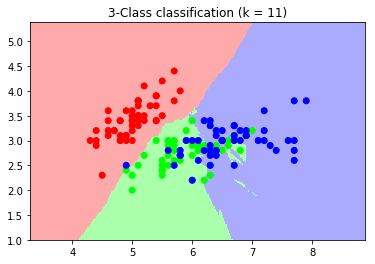

In [34]:
#Now you can call your image with just one variable
fig

### 3.3 Saving the model and the plot <a name="subsaving-models"></a>

As we have everything prepared - our model and our plots. We can finaly save them. Plots can be used for presentations and models can be used for future re-use, so that time would not be spent on training them again. We can save the models by running earlier the *optional* command **from joblib import dump, load**.

The functions themselves are fully straightforward:

In [35]:
#To save the model and load it into a new variable:
#dump + () <- name of the model you want to save + "name under which you want to save it"
#The name of the model in this case is something you have indicated before proceeding with the training of it:
#In this case it was 'neigh' but the name could have been anything
#neigh = KNeighborsClassifier(n_neighbors = n_value)

dump(neigh, '11_knn.joblib')

#To load the function, you can use the load function from the joblib.load
#assign a new variable into which the model will be saved + = load + () <- the path and name of the model you want to load
#for us it is located in the same file as our .ipynb file, therefore we are not indicating any directories

neigh_new = load('11_knn.joblib') 

In [36]:
#We can check if the model loaded into the new variable properly
#We have saved the model using 11 neighbour. It can be seen from value n_neighbors=11 in the model that it was loaded 
#with correct pre-sets and therefore assumingly in a correct manner.

neigh_new

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [37]:
#To save images, simply run the following function:
#name of the figure's variable + .savefig + () <- name under which you want to save your figure
fig.savefig('KNN_demo.png')

#Reloading the image back into the notebook is a bit of different story and do not really fit in the context of this
#tutorial, but general instrucitons would be to use the following methodology:
img=plt.imread('KNN_demo.png')

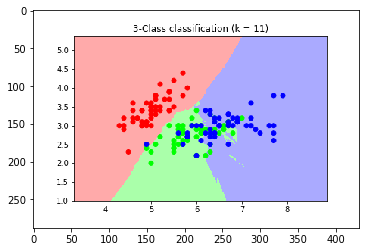

In [38]:
#Not the most convenient way, but proper ways would require importation of few extra tools which are skipped.
#However, you can read more on it: https://stackoverflow.com/questions/35286540/display-an-image-with-python
plt.imshow(img)

### 4. Putting everything in one code <a name = "all-in-one"></a> 

For this part I will try to agregate everything together in a one executable function, for which you need to only indicate several parameters to run. It will be doing everything above. Now do take in consideration that this function will not be full, and its main goal is to do two things $1$ prepare the model for a KNN classifier; $2$ produce a colored regional plot for the KNN classifier. It should be noted that this function can have much more applications in general as in - working on predicting data, working on optimization of the model, but it won't...because that was not the original intent of it. Though you personally can work on it further and expand it's capabilities and utility, for now, it will be a little limited.

As well, it will be put into form of functions (as I personally feel it is more convenient), ad as well, because classes is not something I would want to utilize in a project that is aimed at educating begginers in this field.

In [39]:
def KNN_2D_plot(data, targets, test_size = 0.33, random_state = 42, knn_limit = True, step_size_mesh = 0.02):
    """
    Created by: Si_ja
    https://github.com/Si-ja
    Date: 2019-05-01
    Last build: 2019-05-01
    
    This is a one in all function that takes your data, trains a KNN model and visualizes it. For vizualisation it uses both the training and test data that go into the model. However it only provides the accuracy of the test set.
    
    What you need to know and give a model to work with:
    
    *data = indicate data with which you are working. It should have only 2 variables. In short: there should be at least and also at max 2 columns of data. Number of rows does not matter.
    
    *targets = basically labes for your data. This should be prepared in a numerical fashion preferably.
    
    *test_size = how much of your data will go into the training and into the testing set. By default 33% of data is going into the testing set and 66% into the training set.
    
    *random_state = indicate a seed for spliting the data and training it. Good for replicability sake. By default the value is set to 42.
    
    *knn_limit = this will allow for the system to experiment with how many k values can be tried for preparing the  knn model. By default value is set to True, meaning experimentation will happen only on 13 values: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]. If it is changed to False, the conditions will change and the experimentation set might decrease or increase. Alternative method uses 10% of datas info to create a list of KNNs.
    #E.g. if there are 150 entries then neighbors 1,3,5...15 are checked;
    #E.g. if there are 1500 entries then neigbors 1,3,5...150 are checked.
    
    *step_size_mesh = in essence will influence how smooth your graph and colors in it will be. By default set to 0.02. 0.01 Might make a smoother graph, but it will take longer to execute.
    
    Additional notes: the function will save the final graph and the model into your working directory."""
    
    
    #Inserting only the essential function
    #from sklearn import datasets <- commented out as this is ment for you to try on your own data
    from sklearn.neighbors import KNeighborsClassifier    
    from sklearn.model_selection import train_test_split                   
    import matplotlib.pyplot as plt                       
    from matplotlib.colors import ListedColormap          
    import numpy as np                                    
    from joblib import dump
    
    
    import sys 
    #This is a new one. A basically safety net to not crash anything. If it never triggers, be happy.
    #Essence - it will allow for stoping of executing of a function if it is noticed that data is not prepared
    #in the correct fashion. An error will signify of that.
  
    #Assign correct information into required variables to train the data
    X = data
    y = targets
    test_size = test_size
    random_state = random_state
    targets_amount = len(set(y))
    h = step_size_mesh
    #Experimentation is bound to happen only with 13 alternative KNNs, unless specified otherwise
    n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
    #Alternative method that uses 10% of datas info to create a list of KNNs.
    #E.g. if there are 150 entries then neighbors 1,3,5...15 are checked
    #E.g. if there are 1500 entries then neigbors 1,3,5...150 are checked
    alt_n_neighbors = np.arange(1, (X.shape[0]/10)+1, 2, dtype = int)      
    light_colors = ["#FFAAAA", "#AAFFAA", "#AAAAFF", "#FFD0AA", "#FFC1FC","#FFC1DC", "#9EFFF5", "#E1FFA0", "#A8FFE1", "#E593FF"]
    bold_colors = ["#FF0000", "#00FF00", "#0000FF", "#FC7000", "#FC00F3", "#FF006F", "#00FFE4", "#AEFF00", "#00FFA9", "#C300FF"]
    
    #1st safety check:
    if len(X) != len(y):
        print("Your data and targets do not match. Data has {} entries and the target {}".format(len(X), len(y)))
        print("The execution will not stop!")
        sys.exit()
    #2nd safety check:
    if X.shape[1] != 2:
        print("You will not be able to visualize a not 2 dimensional space. You are working with {} variables. Please indicate only 2.".format(X.shape[1]))
        print("The execution will not stop!")
        sys.exit()
    #3rd safety check:
    if test_size > 1.0:
        print("You cannot allocate less than 0% into the testing set. Please chance the test_size value.")
        print("The execution will not stop!")
        sys.exit()
    #4th safety checker:
    if targets_amount > 10:
        print("There are too many classes to visualize. This function can only handle up to 10. You have {}".format(targets_amount))
        print("The execution will not stop!")
        sys.exit()
    
    #Split and shuffle the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    #Limiter checker on how many knn will have to be assessed. Naturally affecting the time of model creation for bigger
    #sets of data
    if knn_limit == True:
        n_n = n_neighbors
    else:
        n_n = alt_n_neighbors
        
    #Optimizing and preparing the model
    results = {} 
    for n_value in n_n:
        neigh = KNeighborsClassifier(n_neighbors = n_value)
        neigh.fit(X_train, y_train)
        final_score = np.round(100*neigh.score(X_test, y_test),2)
        results[n_value] = final_score
    maximum_val = max(results, key=results.get)
    neigh = KNeighborsClassifier(n_neighbors = maximum_val)
    neigh.fit(X_train, y_train)
    
    #Preparing the colors
    cmap_light = ListedColormap(light_colors[0:targets_amount])
    cmap_bold = ListedColormap(bold_colors[0:targets_amount])
    
    #Preparing the plane
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #Preparing the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig = plt.figure()
    #this will save your image into an internal variable
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{}-Class classification (K = {}; Accuracy = {}%)".format(targets_amount, maximum_val, results[maximum_val] ))
    plt.show()
    
    dump(neigh, 'NEW_knn.joblib')
    fig.savefig('NEW_KNN_plot.png') 

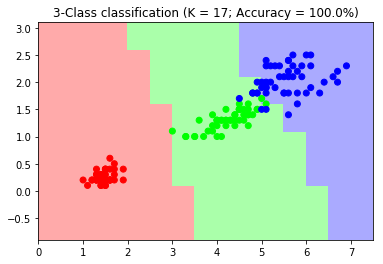

In [40]:
from sklearn import datasets
KNN_2D_plot(iris.data[:, 2:4], iris.target, step_size_mesh = 0.5)

## 5. References <a name = "references"></a>

Further are presented some references that I used for making of this file. As well as something that might be helpful as additional reading to get into if something is left unclear:

(It is not of an academic fashion, but it's for general refrences and lerning sake).

- "Add new keys to a dictionary?" https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
- "print highest value in dict with key [duplicate]" https://stackoverflow.com/questions/26871866/print-highest-value-in-dict-with-key?lq=1
- "k nearest neighbors" https://pythonspot.com/k-nearest-neighbors/
- "sklearn.model_selection.train_test_split" https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- "Model persistence" https://scikit-learn.org/stable/modules/model_persistence.html
- "matplotlib.colors.ListedColormap" https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html
- "Graph k-NN decision boundaries in Matplotlib" https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
- "What is the purpose of meshgrid in Python / NumPy?" https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy